In [3]:
import os

import numpy as np
import cv2   as cv

import matplotlib.pyplot as plt

from matplotlib.pyplot   import imshow, subplot, title, plot

from ipywidgets          import interactive

%matplotlib inline

def fig(w,h):
    plt.figure(figsize=(w,h))

def readrgb(file):
    return cv.cvtColor( cv.imread(file), cv.COLOR_BGR2RGB) 

def rgb2gray(x):
    return cv.cvtColor(x,cv.COLOR_RGB2GRAY)

def imshowg(x):
    imshow(x, "gray")

# para imprimir arrays con el número de decimales deseados
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    yield 
    np.set_printoptions(**original)

def sharr(a, prec=3):
    with printoptions(precision=prec, suppress=True):
        print(a)
               
### HERRAMIENTAS

def desp(d):
    dx,dy = d
    return np.array([
            [1,0,dx],
            [0,1,dy],
            [0,0,1]])

pi = np.pi
degree = pi/180

In [9]:
rutas_list = [
    '../tickets_imagenes/181010_carreforur_conflash_1.JPG',
    '../tickets_imagenes/181010_carreforur_conflash_2.JPG',
    '../tickets_imagenes/181010_carreforur_conflash_3.JPG', 
]

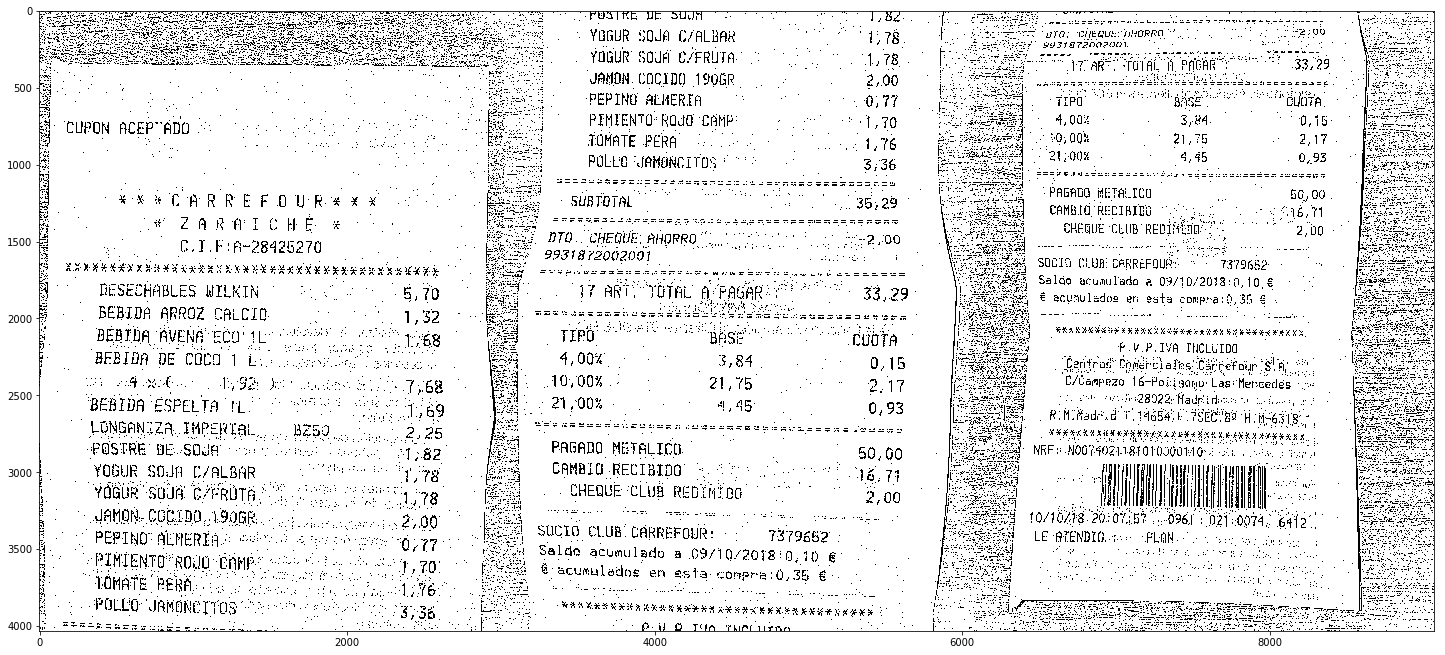

In [49]:
rgb_list = []
images_list = []
for index, item in enumerate(rutas_list):
    rgb_list.append(readrgb(item))
    
    # convert the warped image to grayscale
    gray = cv.cvtColor(rgb_list[index], cv.COLOR_BGR2GRAY)

    # sharpen image
    sharpen = cv.GaussianBlur(gray, (0,0), 3)
    sharpen = cv.addWeighted(gray, 1.5, sharpen, -0.5, 0)

    # apply adaptive threshold to get black and white effect
    thresh = cv.adaptiveThreshold(sharpen, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 21, 15)
    
    images_list.append(thresh)


fig(25,25)
imshowg(np.hstack(images_list));

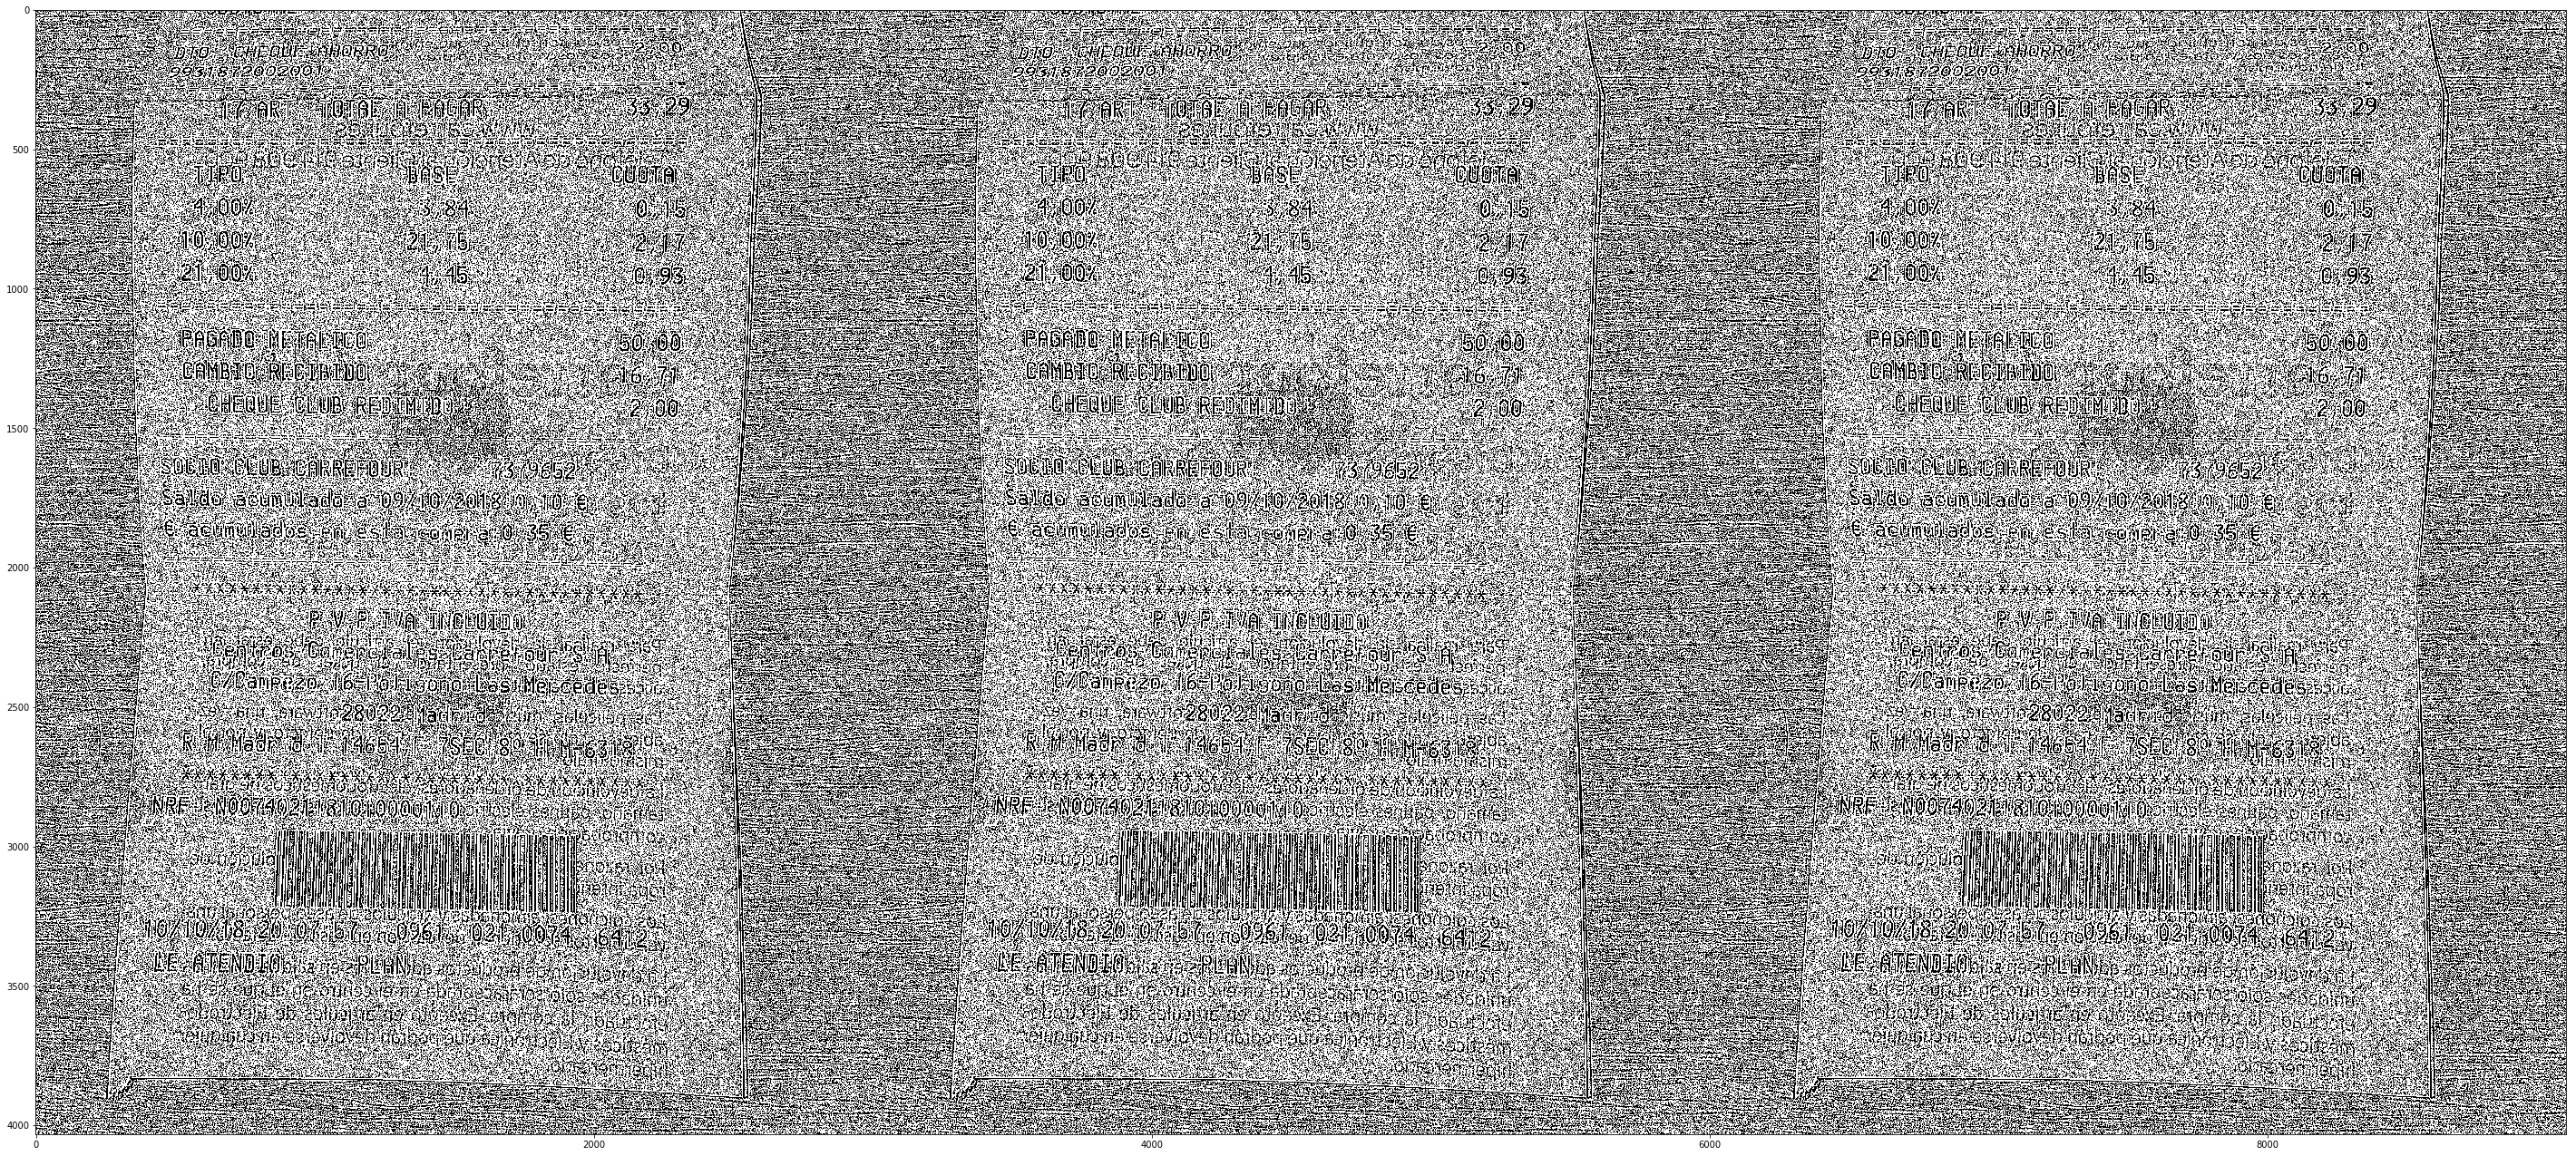

In [81]:
### Probamos sólo con el threshold adaptativo, cambiamos variables para mostrar cómo sale.

rgb_list = []
images_list = [None for i in range(6)]
for index, item in enumerate(rutas_list):

    rgb_list.append(readrgb(item))
    
    # convert the warped image to grayscale
    gray = cv.cvtColor(rgb_list[index], cv.COLOR_BGR2GRAY)


    # apply adaptive threshold to get black and white effect
    thresh = cv.adaptiveThreshold(sharpen, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

    images_list[index] = thresh
    
    thresh = cv.adaptiveThreshold(sharpen, 200, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

    images_list[index+len(rgb_list)] = thresh


fig(50,25)
imshowg(np.hstack(images_list[0:3]));
#fig(25,25)
#imshowg(np.hstack(images_list[3:6]));